**TUGAS BESAR DASAR KECERDASAN ARTIFICIAL**

*kelompok 8*

**Heatmap Korelasi semua fitur**

In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

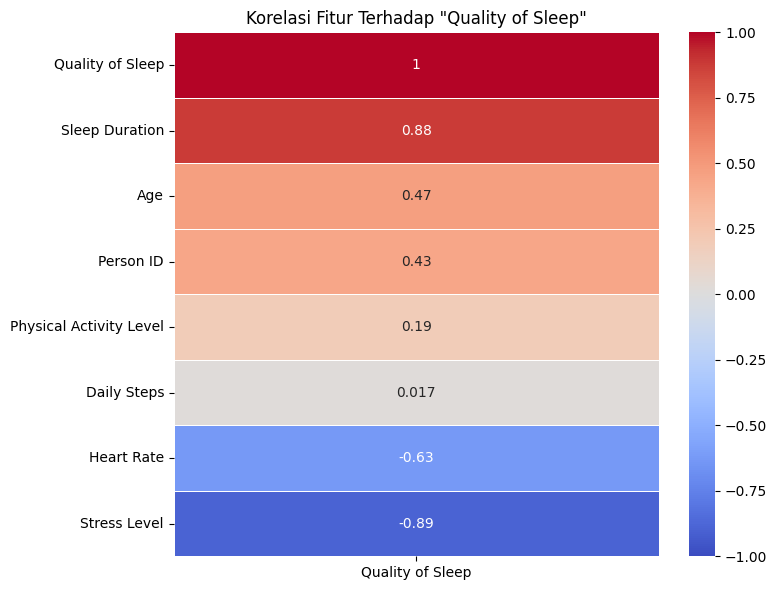

In [362]:
# baca data
df = pd.read_csv('simple version data tubes dka.csv')

# menghitung korelasi
correlation_matrix = df.corr(numeric_only=True)
target = 'Quality of Sleep'
correlation_with_target = correlation_matrix[[target]].sort_values(by=target, ascending=False)

# membuat plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title(f'Korelasi Fitur Terhadap "{target}"')
plt.tight_layout()
plt.show()

**Variavel numerik - kategorik**

In [363]:
# Baca data
df = pd.read_csv('simple version data tubes dka.csv')

# Memisahkan variabel numerik dan kategorikal
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Menampilkan hasil klasifikasi
print("\nVariabel Numerik:")
print(numerical_vars)
print("\nVariabel Kategorikal:")
print(categorical_vars)



Variabel Numerik:
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Variabel Kategorikal:
['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


**TAHAP PRE-PROCESSING DATASET**

In [364]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [365]:
# Baca dataset
df = pd.read_csv('simple version data tubes dka.csv')

# === 1. Data Cleaning ===
# Tangani nilai yang hilang
df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].mean())
df['Quality of Sleep'] = df['Quality of Sleep'].fillna(df['Quality of Sleep'].mode()[0])
df['Physical Activity Level'] = df['Physical Activity Level'].fillna(df['Physical Activity Level'].mean())
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mean())
df['BMI Category'] = df['BMI Category'].fillna(df['BMI Category'].mode()[0])
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].mode()[0])
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Daily Steps'] = df['Daily Steps'].fillna(df['Daily Steps'].mean())
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0])

# Hapus duplikat
df = df.drop_duplicates()

In [366]:
# === 2. Data Transformation ===
# Blood Pressure dipisah jadi systolic dan diastolic karena memiliki nilai yang berbeda
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')
df = df.drop(columns=['Blood Pressure'])

# Label Encoding(memberi angka numerik) untuk kolom kategori
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

In [367]:
# === 3. Data Reduction === #
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['Person ID'])

In [368]:
# Menyimpan Hasil ke File Baru 
output_file = 'hasil_preproses_dataset_kel8.csv'
df.to_csv(output_file, index=False)

# Menampilkan informasi file yang telah disimpan
output_file

'hasil_preproses_dataset_kel8.csv'

**RANDOM FOREST**

In [369]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

Korelasi fitur terhadap label:
Quality of Sleep           1.000000
Sleep Duration             0.879510
Age                        0.473734
Sleep Disorder             0.332406
Physical Activity Level    0.192896
Daily Steps                0.016791
Diastolic BP              -0.110151
Systolic BP               -0.121632
Occupation                -0.278071
Gender                    -0.291366
BMI Category              -0.312562
Heart Rate                -0.630928
Stress Level              -0.892747
Name: Quality of Sleep, dtype: float64

Feature Importance dari Random Forest Regressor:
Sleep Duration             0.743534
Stress Level               0.161360
Heart Rate                 0.028590
Age                        0.026312
Daily Steps                0.016878
Occupation                 0.006698
BMI Category               0.006331
Diastolic BP               0.004665
Systolic BP                0.002646
Physical Activity Level    0.001805
Gender                     0.000771
Sleep Disorder  

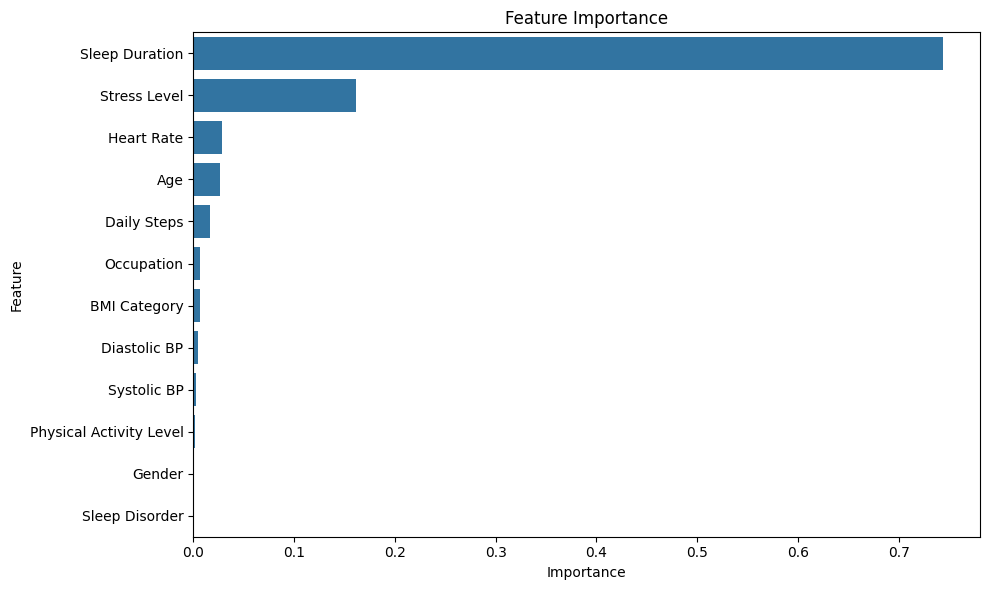

In [370]:
# Baca dataset
df = pd.read_csv('hasil_preproses_dataset_kel8.csv')

# Kolom label (target)
target_col = 'Quality of Sleep'

# Hitung korelasi fitur dengan label
correlation = df.corr()[target_col].sort_values(ascending=False)
print("Korelasi fitur terhadap label:")
print(correlation)

# Pisahkan fitur dan label
X = df.drop(columns=[target_col])
y = df[target_col]

# Tentukan fitur penting menggunakan Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Ambil fitur penting dan urutkan
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance dari Random Forest Regressor:")
print(feature_importances)

# Menampilkan grafik hasil random forest
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature") 
plt.tight_layout()
plt.show()


**PROSES FUZZY**

*Fuzzification*

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [372]:
import pandas as pd

# baca datset
file_path = 'hasil_preproses_dataset_kel8.csv'
data = pd.read_csv(file_path)

# pilih kolom yang ingin dianalisis
columns_of_interest = ['Sleep Duration', 'Heart Rate', 'Stress Level', 'Quality of Sleep']

# Cari min max nya
min_max_values = data[columns_of_interest].agg(['min', 'max'])

# tampilkan hasil
print(min_max_values)


     Sleep Duration  Heart Rate  Stress Level  Quality of Sleep
min             5.5          60             1                 4
max             9.0         100            10                 9


In [373]:
# Fungsi keanggotaan
def trapezoid(x, a, b, c, d):
    return np.maximum(0, np.minimum((x - a) / (b - a + 1e-9), np.minimum(1, (d - x) / (d - c + 1e-9))))

def triangle(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a + 1e-9), (c - x) / (c - b + 1e-9)))

# Fuzzifikasi masing-masing fitur
def fuzzify_sleep_duration(x): # range 5.5 - 9.0
    return {
        'rendah': trapezoid(x, 5.5, 5.5, 6.0, 6.5),
        'sedang': triangle(x, 6.0, 7.0, 8.0),
        'tinggi': trapezoid(x, 7.5, 8.0, 9.0, 9.0)
    }

def fuzzify_stress_level(x): #range 1-10
    return {
        'rendah': trapezoid(x, 1, 1, 2.5, 4),
        'sedang': triangle(x, 3, 5.5, 8),
        'tinggi': trapezoid(x, 6.5, 8, 10, 10)
    }

def fuzzify_heart_rate(x): #range 60 - 100
    return {
        'rendah': trapezoid(x, 60, 60, 66, 72),
        'sedang': triangle(x, 68, 76, 84),
        'tinggi': trapezoid(x, 78, 85, 100, 100)
    }

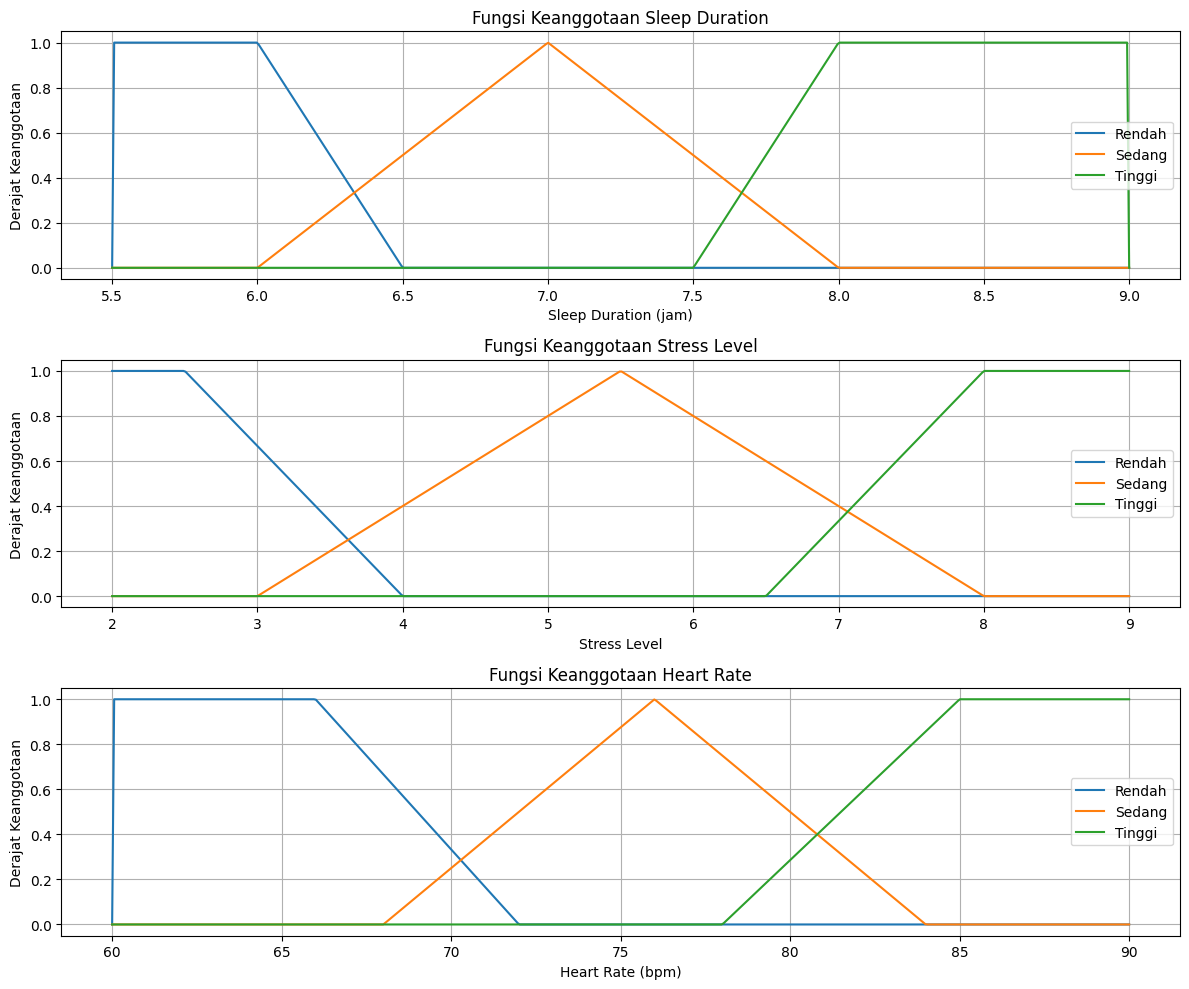

In [374]:
# menampilkan fungsi keanggotannya 
def plot_fuzzify_sleep_duration():
    x = np.linspace(5.5, 9, 500)
    rendah = []
    sedang = []
    tinggi = []

    for val in x:
        fuzz = fuzzify_sleep_duration(val)
        rendah.append(fuzz['rendah'])
        sedang.append(fuzz['sedang'])
        tinggi.append(fuzz['tinggi'])

    plt.plot(x, rendah, label='Rendah')
    plt.plot(x, sedang, label='Sedang')
    plt.plot(x, tinggi, label='Tinggi')
    plt.title('Fungsi Keanggotaan Sleep Duration')
    plt.xlabel('Sleep Duration (jam)')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()
    plt.grid(True)

def plot_fuzzify_stress_level():
    x = np.linspace(2, 9, 500)
    rendah = []
    sedang = []
    tinggi = []

    for val in x:
        fuzz = fuzzify_stress_level(val)
        rendah.append(fuzz['rendah'])
        sedang.append(fuzz['sedang'])
        tinggi.append(fuzz['tinggi'])

    plt.plot(x, rendah, label='Rendah')
    plt.plot(x, sedang, label='Sedang')
    plt.plot(x, tinggi, label='Tinggi')
    plt.title('Fungsi Keanggotaan Stress Level')
    plt.xlabel('Stress Level')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()
    plt.grid(True)

def plot_fuzzify_heart_rate():
    x = np.linspace(60, 90, 500)
    rendah = []
    sedang = []
    tinggi = []

    for val in x:
        fuzz = fuzzify_heart_rate(val)
        rendah.append(fuzz['rendah'])
        sedang.append(fuzz['sedang'])
        tinggi.append(fuzz['tinggi'])

    plt.plot(x, rendah, label='Rendah')
    plt.plot(x, sedang, label='Sedang')
    plt.plot(x, tinggi, label='Tinggi')
    plt.title('Fungsi Keanggotaan Heart Rate')
    plt.xlabel('Heart Rate (bpm)')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(12, 10))
plt.subplot(3,1,1)
plot_fuzzify_sleep_duration()
plt.subplot(3,1,2)
plot_fuzzify_stress_level()
plt.subplot(3,1,3)
plot_fuzzify_heart_rate()
plt.tight_layout()
plt.show()

*inference*

In [375]:
# Inference Mamdani
def mamdani_inference(fz_sleep, fz_stress, fz_hr):
    levels = ["rendah", "sedang", "tinggi"]
    rules = []

    # Membuat aturan-aturan berdasarkan kombinasi variabel input
    for sleep in levels:
        for stress in levels:
            for hr in levels:
                α = min(fz_sleep[sleep], fz_stress[stress], fz_hr[hr])

                # Aturan 27 kombinasi
                if sleep == "tinggi" and stress == "rendah" and hr == "rendah":
                    out = "baik"
                elif sleep == "tinggi" and stress == "rendah" and hr == "sedang":
                    out = "baik"
                elif sleep == "tinggi" and stress == "rendah" and hr == "tinggi":
                    out = "sedang"

                elif sleep == "tinggi" and stress == "sedang" and hr == "rendah":
                    out = "baik"
                elif sleep == "tinggi" and stress == "sedang" and hr == "sedang":
                    out = "baik"
                elif sleep == "tinggi" and stress == "sedang" and hr == "tinggi":
                    out = "sedang"

                elif sleep == "tinggi" and stress == "tinggi" and hr == "rendah":
                    out = "sedang"
                elif sleep == "tinggi" and stress == "tinggi" and hr == "sedang":
                    out = "sedang"
                elif sleep == "tinggi" and stress == "tinggi" and hr == "tinggi":
                    out = "buruk"

                elif sleep == "sedang" and stress == "rendah" and hr == "rendah":
                    out = "baik"
                elif sleep == "sedang" and stress == "rendah" and hr == "sedang":
                    out = "sedang"
                elif sleep == "sedang" and stress == "rendah" and hr == "tinggi":
                    out = "sedang"

                elif sleep == "sedang" and stress == "sedang" and hr == "rendah":
                    out = "sedang"
                elif sleep == "sedang" and stress == "sedang" and hr == "sedang":
                    out = "sedang"
                elif sleep == "sedang" and stress == "sedang" and hr == "tinggi":
                    out = "buruk"

                elif sleep == "sedang" and stress == "tinggi" and hr == "rendah":
                    out = "sedang"
                elif sleep == "sedang" and stress == "tinggi" and hr == "sedang":
                    out = "buruk"
                elif sleep == "sedang" and stress == "tinggi" and hr == "tinggi":
                    out = "buruk"

                elif sleep == "rendah" and stress == "rendah" and hr == "rendah":
                    out = "sedang"
                elif sleep == "rendah" and stress == "rendah" and hr == "sedang":
                    out = "sedang"
                elif sleep == "rendah" and stress == "rendah" and hr == "tinggi":
                    out = "buruk"

                elif sleep == "rendah" and stress == "sedang" and hr == "rendah":
                    out = "sedang"
                elif sleep == "rendah" and stress == "sedang" and hr == "sedang":
                    out = "buruk"
                elif sleep == "rendah" and stress == "sedang" and hr == "tinggi":
                    out = "buruk"

                elif sleep == "rendah" and stress == "tinggi" and hr == "rendah":
                    out = "buruk"
                elif sleep == "rendah" and stress == "tinggi" and hr == "sedang":
                    out = "buruk"
                elif sleep == "rendah" and stress == "tinggi" and hr == "tinggi":
                    out = "buruk"
                else:
                    out = "sedang"  # Default

                rules.append((out, α))

    # Menentukan nilai output berdasarkan aturan yang diberikan
    return {
        "buruk": max([α for out, α in rules if out == "buruk"], default=0),
        "sedang": max([α for out, α in rules if out == "sedang"], default=0),
        "baik": max([α for out, α in rules if out == "baik"], default=0),
    }


In [376]:
#inference sugeno
def sugeno_inference(fz_sleep, fz_stress, fz_hr):
    levels = ["rendah", "sedang", "tinggi"]
    rules = []

    def output_value(sleep, stress, hr):
    
        # Perbaikan aturan berdasarkan kombinasi input
        if sleep == "tinggi" and stress == "rendah" and hr == "rendah":
            return 9
        elif sleep == "tinggi" and stress == "rendah" and hr == "sedang":
            return 8.5  
        elif sleep == "tinggi" and stress == "rendah" and hr == "tinggi":
            return 8
        elif sleep == "tinggi" and stress == "sedang" and hr == "rendah":
            return 8
        elif sleep == "tinggi" and stress == "sedang" and hr == "sedang":
            return 7.5  
        elif sleep == "tinggi" and stress == "sedang" and hr == "tinggi":
            return 7
        elif sleep == "tinggi" and stress == "tinggi" and hr == "rendah":
            return 7  
        elif sleep == "tinggi" and stress == "tinggi" and hr == "sedang":
            return 6.5  
        elif sleep == "tinggi" and stress == "tinggi" and hr == "tinggi":
            return 6
        elif sleep == "sedang" and stress == "rendah" and hr == "rendah":
            return 7.5 
        elif sleep == "sedang" and stress == "rendah" and hr == "sedang":
            return 7
        elif sleep == "sedang" and stress == "rendah" and hr == "tinggi":
            return 6.5  
        elif sleep == "sedang" and stress == "sedang" and hr == "rendah":
            return 7
        elif sleep == "sedang" and stress == "sedang" and hr == "sedang":
            return 6.5  
        elif sleep == "sedang" and stress == "sedang" and hr == "tinggi":
            return 6
        elif sleep == "sedang" and stress == "tinggi" and hr == "rendah":
            return 6
        elif sleep == "sedang" and stress == "tinggi" and hr == "sedang":
            return 5.5  
        elif sleep == "sedang" and stress == "tinggi" and hr == "tinggi":
            return 5
        elif sleep == "rendah" and stress == "rendah" and hr == "rendah":
            return 6  
        elif sleep == "rendah" and stress == "rendah" and hr == "sedang":
            return 5.5 
        elif sleep == "rendah" and stress == "rendah" and hr == "tinggi":
            return 5
        elif sleep == "rendah" and stress == "sedang" and hr == "rendah":
            return 5.5  
        elif sleep == "rendah" and stress == "sedang" and hr == "sedang":
            return 5
        elif sleep == "rendah" and stress == "sedang" and hr == "tinggi":
            return 4.5 
        elif sleep == "rendah" and stress == "tinggi" and hr == "rendah":
            return 5
        elif sleep == "rendah" and stress == "tinggi" and hr == "sedang":
            return 4.5  
        elif sleep == "rendah" and stress == "tinggi" and hr == "tinggi":
            return 4
        else:
            return 5.5

    for sleep in levels:
        for stress in levels:
            for hr in levels:
                α = min(fz_sleep[sleep], fz_stress[stress], fz_hr[hr])
                z = output_value(sleep, stress, hr)
                rules.append((α, z))

    numerator = sum(w * z for w, z in rules)
    denominator = sum(w for w, _ in rules)

    # mengembalikan nilai anatra 4 hingga 9
    return 4 + (numerator / denominator - 4) * (5 / (9 - 4)) if denominator != 0 else 4  

*Defuzzification*

In [377]:
# Fungsi keanggotaan untuk output yang akan di ginakan di (defuzzification Mamdani)
def output_quality_of_sleep(x, label):
    # Rentang 4-9
    if label == "buruk":
        if x <= 4.5:
            return 1
        elif 4.5 < x <= 6:
            return 1 - (x - 4.5) / 1.5
        else:
            return 0
    elif label == "sedang":
        if 4.5 <= x <= 6:
            return (x - 4.5) / 1.5
        elif 6 < x <= 7.5:
            return (7.5 - x) / 1.5
        else:
            return 0
    elif label == "baik":
        if x >= 7.5:
            return 1
        elif 6 <= x < 7.5:
            return (x - 6) / 1.5
        else:
            return 0
    else:
        return 0

# Defuzzification Mamdani
def defuzzify_mamdani(result):
    x_range = np.linspace(4, 9, 1000)  # Rentang output fuzzy (4-9)
    numerator = 0
    denominator = 0

    for x in x_range:
        # Dapatkan nilai keanggotaan untuk "buruk", "sedang", dan "baik"
        μ_buruk = min(result.get("buruk", 0), output_quality_of_sleep(x, "buruk"))
        μ_sedang = min(result.get("sedang", 0), output_quality_of_sleep(x, "sedang"))
        μ_baik = min(result.get("baik", 0), output_quality_of_sleep(x, "baik"))

        # Agregasi: Maksimal nilai keanggotaan untuk semua kategori
        μ = max(μ_buruk, μ_sedang, μ_baik)
        # Perhitungan rata-rata tertimbang
        numerator += x * μ
        denominator += μ

    # Hasil defuzzifikasi metode centroid
    return numerator / denominator if denominator != 0 else 0

# Defuzzification Sugeno
def defuzzify_sugeno(sugeno_score):
    # Output Sugeno sudah scalar Penskalaan ke rentang 4 - 9 
    return 4 + (sugeno_score - 4) * (5 / 5) 


**PERCOBAAN KE 10 SAMPEL DATA**

In [378]:
# Baca data
df = pd.read_csv("hasil_preproses_dataset_kel8.csv")

# Ambil 10 data pertama
sample_300 = df.head(300) 

# Iterasi melalui data
for idx, row in sample_300.iterrows():
    # Fuzzify input
    fz_sleep = fuzzify_sleep_duration(row["Sleep Duration"])
    fz_stress = fuzzify_stress_level(row["Stress Level"])
    fz_hr = fuzzify_heart_rate(row["Heart Rate"])
    # Mamdani Inference
    mam_res = mamdani_inference(fz_sleep, fz_stress, fz_hr)
    mam_score = defuzzify_mamdani(mam_res)
    # Sugeno Inference
    sug_score = sugeno_inference(fz_sleep, fz_stress, fz_hr)
    sug_score_defuzz = defuzzify_sugeno(sug_score)

    # Fungsi untuk memberi label berdasarkan score
    def labelize(score):
        if score <= 4:
            return "buruk"
        elif score <= 6:
            return "sedang"
        else:
            return "baik"

    # Menentukan label untuk Mamdani dan Sugeno
    mam_label = labelize(mam_score)
    sug_label = labelize(sug_score_defuzz)

    # Output hasil
    print(f"Data ID {idx + 1}")  # Karena 'ID' tidak ada, pakai index + 1
    print(f"  Sleep Duration: {row['Sleep Duration']:.2f}, Stress Level: {row['Stress Level']:.2f}, Heart Rate: {row['Heart Rate']:.2f}")
    print(f"  Mamdani Score: {mam_score:.2f} → {mam_label}")
    print(f"  Sugeno Score: {sug_score_defuzz:.2f} → {sug_label}")
    print("-" * 50)

Data ID 1
  Sleep Duration: 6.10, Stress Level: 6.00, Heart Rate: 77.00
  Mamdani Score: 4.97 → sedang
  Sugeno Score: 5.17 → sedang
--------------------------------------------------
Data ID 2
  Sleep Duration: 6.20, Stress Level: 8.00, Heart Rate: 75.00
  Mamdani Score: 4.80 → sedang
  Sugeno Score: 4.75 → sedang
--------------------------------------------------
Data ID 3
  Sleep Duration: 6.20, Stress Level: 8.00, Heart Rate: 75.00
  Mamdani Score: 4.80 → sedang
  Sugeno Score: 4.75 → sedang
--------------------------------------------------
Data ID 4
  Sleep Duration: 5.90, Stress Level: 8.00, Heart Rate: 85.00
  Mamdani Score: 4.70 → sedang
  Sugeno Score: 4.00 → buruk
--------------------------------------------------
Data ID 5
  Sleep Duration: 5.90, Stress Level: 8.00, Heart Rate: 85.00
  Mamdani Score: 4.70 → sedang
  Sugeno Score: 4.00 → buruk
--------------------------------------------------
Data ID 6
  Sleep Duration: 5.90, Stress Level: 8.00, Heart Rate: 85.00
  Mamdani 

**EVALUASI HASIL**

In [379]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Baca dataset
df = pd.read_csv("hasil_preproses_dataset_kel8.csv")

# Bikin kategori target
def categorize_quality(val):
    if val <= 4:
        return "buruk"
    elif val <= 6:
        return "sedang"
    else:
        return "baik"

df['Quality_Category'] = df['Quality of Sleep'].apply(categorize_quality)

def labelize(score):
    if score <= 4:
        return "buruk"
    elif score <= 6:
        return "sedang"
    else:
        return "baik"

def process_fuzzy(row):
    fz_sleep = fuzzify_sleep_duration(row["Sleep Duration"])
    fz_stress = fuzzify_stress_level(row["Stress Level"])
    fz_hr = fuzzify_heart_rate(row["Heart Rate"])

    mam_res = mamdani_inference(fz_sleep, fz_stress, fz_hr)
    mam_score = defuzzify_mamdani(mam_res)

    sug_score = sugeno_inference(fz_sleep, fz_stress, fz_hr)
    sug_score_defuzz = defuzzify_sugeno(sug_score)
    
    mam_label = labelize(mam_score)
    sug_label = labelize(sug_score_defuzz)
    
    return pd.Series([mam_score, sug_score_defuzz, mam_label, sug_label])

# Proses semua data
df[['mam_score', 'sug_score', 'mam_label', 'sug_label']] = df.apply(process_fuzzy, axis=1)

# Evaluasi fuzzy model dalam persen
def evaluate_fuzzy_model(y_true, y_pred_label):
    accuracy = accuracy_score(y_true, y_pred_label) * 100  
    precision = precision_score(y_true, y_pred_label, average='weighted') * 100 
    recall = recall_score(y_true, y_pred_label, average='weighted') * 100
    f1 = f1_score(y_true, y_pred_label, average='weighted') * 100 

    #  Menampilkan hasil evaluasi dalam persen
    print("Accuracy: {:.2f}%".format(accuracy))  
    print("Precision: {:.2f}%".format(precision)) 
    print("Recall: {:.2f}%".format(recall)) 
    print("F1 Score: {:.2f}%".format(f1))  

print("\nEvaluasi Mamdani:")
evaluate_fuzzy_model(df['Quality_Category'], df['mam_label'])
print("\nEvaluasi Sugeno:")
evaluate_fuzzy_model(df['Quality_Category'], df['sug_label'])


Evaluasi Mamdani:
Accuracy: 94.12%
Precision: 94.83%
Recall: 94.12%
F1 Score: 94.34%

Evaluasi Sugeno:
Accuracy: 92.78%
Precision: 93.52%
Recall: 92.78%
F1 Score: 92.91%
